In [51]:
### 패키지 로딩 Load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 데이터 가져오기

In [33]:
#당뇨병 데이터 로딩
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

In [34]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [35]:
diabetes['data'].shape

(442, 10)

In [36]:
diabetes['target'].shape

(442,)

In [79]:
print(diabetes['feature_names'])

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [82]:
df_X = diabetes['data']
num_features = len(df_X[0])
print((df_X.shape,df_X.dtype))
print(num_features)

((442, 10), dtype('float64'))
10


In [39]:
df_y = diabetes['target']
print((df_y.shape,df_y.dtype))

((442,), dtype('float64'))


In [40]:
type(df_X)

numpy.ndarray

In [41]:
type(df_y)

numpy.ndarray

### 학습/테스트 데이터 분리

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=53)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


### 모델 함수

In [123]:
np.random.seed(52)
W = np.random.rand(num_features) # W 파라미터 초기값 할당
b = np.random.rand()
# W = np.zeros(num_features) # W 파라미터 초기값 할당
# b = np.zeros(1)

In [124]:
def model(X, W, b):
    predictions = 0
    
    for i in range(len(W)):
        predictions += X[:, i] * W[i]
    
    predictions += b
    
    return predictions

In [125]:
X_train[0,:].shape

(10,)

In [126]:
# model(X_train[0:,:], W, b)

### 손실함수 MSE

In [127]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    
    return mse

In [128]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    
    return L

### 경사하강법 gradient 함수

In [129]:
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # gradient 계산; Transpose!!!
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    
    return dW, db

### 학습률 설정, 모델 학습

Iteration 500 : Loss 5595.6023
Iteration 1000 : Loss 5279.9979
Iteration 1500 : Loss 5010.2113
Iteration 2000 : Loss 4779.0292
Iteration 2500 : Loss 4580.4034
Iteration 3000 : Loss 4409.2609
Iteration 3500 : Loss 4261.3457
Iteration 4000 : Loss 4133.0853
Iteration 4500 : Loss 4021.4801
Iteration 5000 : Loss 3924.0103
Iteration 5500 : Loss 3838.5578
Iteration 6000 : Loss 3763.3413
Iteration 6500 : Loss 3696.8617
Iteration 7000 : Loss 3637.8565
Iteration 7500 : Loss 3585.2614
Iteration 8000 : Loss 3538.1783
Iteration 8500 : Loss 3495.8489
Iteration 9000 : Loss 3457.6318
Iteration 9500 : Loss 3422.9840
Iteration 10000 : Loss 3391.4449
Iteration 10500 : Loss 3362.6234
Iteration 11000 : Loss 3336.1867
Iteration 11500 : Loss 3311.8512
Iteration 12000 : Loss 3289.3745
Iteration 12500 : Loss 3268.5490
Iteration 13000 : Loss 3249.1965
Iteration 13500 : Loss 3231.1637
Iteration 14000 : Loss 3214.3180
Iteration 14500 : Loss 3198.5449
Iteration 15000 : Loss 3183.7445
Iteration 15500 : Loss 3169.83

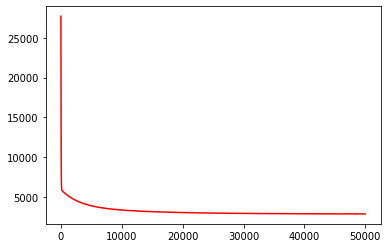

In [130]:
LEARNING_RATE = .01
steps = 50001 # 경사하강 반복횟수
losses = []

for i in range(1, steps):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 500 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

plt.plot(losses, c='r')
plt.show()

### Test 데이터로 성능 평가

In [131]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
print(mse)
print(W)

2925.617010602992
[ 3.77084898e-01 -2.05114568e+02  4.74864962e+02  3.41848187e+02
 -4.35288520e+01 -8.73011613e+01 -1.98170044e+02  1.61714745e+02
  3.74829012e+02  1.05892076e+02]


### 예측 데이터 시각화

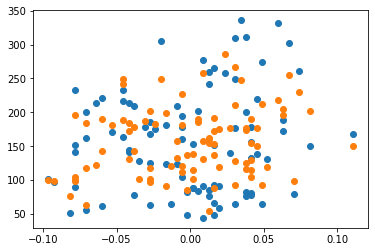

In [132]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()